<a href="https://colab.research.google.com/github/cjfgus983/macineLearningAssignment/blob/main/%EA%B8%B0%EB%A7%90_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **1. Pre-processing to make mean and standard error predictors**

In [103]:
data = pd.read_csv('/content/drive/MyDrive/machineLearning/train_task_3_4.csv')
data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [104]:
data.groupby('QuestionId')
data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [ ]:
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem())

In [ ]:
# 빈 데이터프레임 생성
result_df = pd.DataFrame(columns=['QuestionId', 'Count', 'MeanCorrect', 'SEMCorrect'])

# 그룹화 및 계산 반복
for k, df in data.groupby('QuestionId'):
    count = len(df)
    mean_correct = df['IsCorrect'].mean()
    sem_correct = df['IsCorrect'].sem()

    # 결과를 데이터프레임에 추가
    result_df = result_df.append({'QuestionId': k, 'Count': count, 'MeanCorrect': mean_correct, 'SEMCorrect': sem_correct},
                                 ignore_index=True)



In [107]:
result_df
result_df.to_csv('./result_df.csv')

result_df

,QuestionId,Count,MeanCorrect,SEMCorrect
0,0.0,2812.0,0.443457,0.009370
1,1.0,14.0,0.571429,0.137253
2,2.0,2313.0,0.385214,0.010121
3,3.0,2672.0,0.808757,0.007610
4,4.0,1704.0,0.401408,0.011878
...,...,...,...,...
943,943.0,2653.0,0.566528,0.009623
944,944.0,189.0,0.142857,0.025521
945,945.0,2337.0,0.422336,0.010220
946,946.0,111.0,0.459459,0.047516


In [108]:
check_df = result_df.copy() #to use 5.make ranking

In [11]:
#모델 돌릴 train case
eval_validation = pd.read_csv('/content/drive/MyDrive/machineLearning/quality_response_remapped_public.csv')
eval_validation

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2
5,17,17,56,865,2,1,2,2.0,2
6,27,27,233,478,1,1,1,1.0,2
7,41,41,877,620,2,2,2,2.0,2
8,5,5,246,733,1,1,1,2.0,1
9,35,35,668,741,1,1,1,1.0,1


In [14]:
#이제 score를 기준으로 1이면 왼쪽 문제가 우수 2번이면 오른쪽 문제가 우수
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,0,0,909,318,2,2,2,1.0,2,1.8,2
1,16,16,285,609,2,2,2,2.0,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1,1.6,2
3,38,38,704,127,2,2,1,2.0,2,1.8,2
4,33,33,16,586,1,1,2,2.0,2,1.6,2
5,17,17,56,865,2,1,2,2.0,2,1.8,2
6,27,27,233,478,1,1,1,1.0,2,1.2,1
7,41,41,877,620,2,2,2,2.0,2,2.0,2
8,5,5,246,733,1,1,1,2.0,1,1.2,1
9,35,35,668,741,1,1,1,1.0,1,1.0,1


<Axes: >

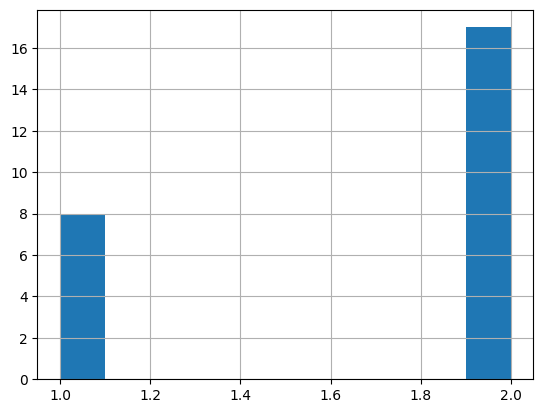

In [15]:
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2

    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [26]:
# 각 문제의 평균과 표준오차가 담긴 result_df에서 eval_validation의 'left'칼럼과 일치하는 QuestionId의 평균과 표준오차의 칼럼을 새로 생성하고 두 테이블을 합친다.
merged_df = eval_validation.merge(result_df[['QuestionId', 'MeanCorrect']], left_on='left', right_on='QuestionId', how='left')
merged_df = merged_df.drop('QuestionId', axis=1)
merged_df

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,MeanCorrect
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0.530864
1,16,16,285,609,2,2,2,2.0,2,2.0,2,0.651419
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0.387779
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0.577481
4,33,33,16,586,1,1,2,2.0,2,1.6,2,0.583478
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0.516450
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0.490023
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0.514231
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0.309091
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0.720177


In [27]:
merged_df = merged_df.merge(result_df[['QuestionId', 'SEMCorrect']], left_on='left', right_on='QuestionId', how='left')
merged_df = merged_df.drop('QuestionId', axis=1)
merged_df = merged_df.merge(result_df[['QuestionId', 'MeanCorrect']], left_on='right', right_on='QuestionId', how='left')
merged_df = merged_df.drop('QuestionId', axis=1)
merged_df = merged_df.merge(result_df[['QuestionId', 'SEMCorrect']], left_on='right', right_on='QuestionId', how='left')
merged_df = merged_df.drop('QuestionId', axis=1)
merged_df

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,MeanCorrect_x,SEMCorrect_x,MeanCorrect_y,SEMCorrect_y
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0.530864,0.055795,0.512821,0.056962
1,16,16,285,609,2,2,2,2.0,2,2.0,2,0.651419,0.009809,0.452665,0.012467
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0.387779,0.016712,0.387486,0.016150
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0.577481,0.011904,0.431193,0.047655
4,33,33,16,586,1,1,2,2.0,2,1.6,2,0.583478,0.010282,0.246761,0.010466
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0.516450,0.009776,0.297436,0.018916
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0.490023,0.009794,0.601036,0.035340
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0.514231,0.012574,0.423168,0.016996
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0.309091,0.012998,0.847059,0.039272
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0.720177,0.008289,0.711146,0.017972


In [68]:
first_clear_df = merged_df.copy()

# **2. Understanding Question Type Rates**

In [63]:
QuestionMetadata = pd.read_csv('/content/drive/MyDrive/machineLearning/question_metadata_task_3_4.csv')
QuestionMetadata

,QuestionId,SubjectId
0,684,"[3, 71, 98, 209]"
1,87,"[3, 71, 98, 209]"
2,679,"[3, 71, 98, 209]"
3,685,"[3, 71, 98, 209]"
4,222,"[3, 71, 98, 209]"
...,...,...
943,313,"[3, 32, 39, 230]"
944,239,"[3, 32, 39, 230]"
945,397,"[3, 32, 39, 230]"
946,897,"[3, 32, 39, 230]"


In [64]:
sorted_df = QuestionMetadata.sort_values('QuestionId', ascending=True)
sorted_df

,QuestionId,SubjectId
215,0,"[3, 32, 40, 245]"
835,1,"[3, 32, 39, 228]"
185,2,"[3, 32, 33, 42, 144, 212]"
131,3,"[3, 32, 42, 211]"
486,4,"[3, 71, 88, 174]"
...,...,...
85,943,"[3, 32, 33, 144]"
729,944,"[3, 32, 37, 221]"
181,945,"[3, 32, 42, 212]"
930,946,"[3, 32, 39, 230]"


In [65]:
sorted_df.index = np.arange(len(sorted_df))
sorted_df

,QuestionId,SubjectId
0,0,"[3, 32, 40, 245]"
1,1,"[3, 32, 39, 228]"
2,2,"[3, 32, 33, 42, 144, 212]"
3,3,"[3, 32, 42, 211]"
4,4,"[3, 71, 88, 174]"
...,...,...
943,943,"[3, 32, 33, 144]"
944,944,"[3, 32, 37, 221]"
945,945,"[3, 32, 42, 212]"
946,946,"[3, 32, 39, 230]"


In [32]:
# 데이터프레임 생성
df = pd.DataFrame({
    'QuestionId': sorted_df['QuestionId'][0:948],
    'SubjectId': sorted_df['SubjectId'][0:948]
})

# SubjectId를 원핫인코딩
pattern = r'\d+'
unique_subjects = sorted(set([int(match.group()) for subject_ids in df['SubjectId'] for match in re.finditer(pattern, str(subject_ids))]))
one_hot_encoded = np.zeros((len(df), len(unique_subjects)), dtype=int)

for i, subject_ids in enumerate(df['SubjectId']):
    for match in re.finditer(pattern, str(subject_ids)):
        subject_id = int(match.group())
        one_hot_encoded[i, unique_subjects.index(subject_id)] = 1

# 결과 확인
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=unique_subjects)
result_df = pd.concat([df['QuestionId'], one_hot_encoded_df], axis=1)
result_df


,QuestionId,3,32,33,36,37,38,39,40,42,...,272,273,275,276,278,406,408,409,439,655
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,943,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
944,944,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
945,945,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
946,946,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


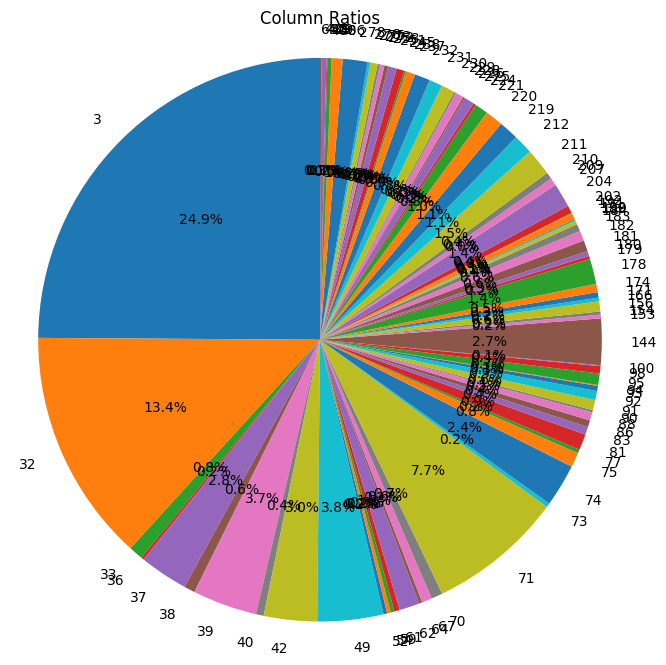

In [33]:
data = result_df.drop('QuestionId', axis=1)

# 칼럼의 합을 구하고 비율로 변환
column_sums = data.sum()
ratios = column_sums / column_sums.sum()

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(ratios, labels=ratios.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Column Ratios')
plt.show()

**Each type of Question is different and this type could be a predictor.**

# **3. Pre-processing to make mean and standard error predictors**

In [66]:
sorted_df

,QuestionId,SubjectId
0,0,"[3, 32, 40, 245]"
1,1,"[3, 32, 39, 228]"
2,2,"[3, 32, 33, 42, 144, 212]"
3,3,"[3, 32, 42, 211]"
4,4,"[3, 71, 88, 174]"
...,...,...
943,943,"[3, 32, 33, 144]"
944,944,"[3, 32, 37, 221]"
945,945,"[3, 32, 42, 212]"
946,946,"[3, 32, 39, 230]"


In [67]:
sorted_df['SubjectId'] = sorted_df['SubjectId'].apply(lambda x: int(x[1:-1].replace(', ', '')))
sorted_df

,QuestionId,SubjectId
0,0,33240245
1,1,33239228
2,2,3323342144212
3,3,33242211
4,4,37188174
...,...,...
943,943,33233144
944,944,33237221
945,945,33242212
946,946,33239230


In [75]:
merged_df = first_clear_df.merge(sorted_df[['QuestionId', 'SubjectId']], left_on='left', right_on='QuestionId', how='left')
merged_df = merged_df.drop('QuestionId', axis=1)
merged_df

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,MeanCorrect_x,SEMCorrect_x,MeanCorrect_y,SEMCorrect_y,SubjectId
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0.530864,0.055795,0.512821,0.056962,33239225
1,16,16,285,609,2,2,2,2.0,2,2.0,2,0.651419,0.009809,0.452665,0.012467,332144204
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0.387779,0.016712,0.387486,0.016150,37175178
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0.577481,0.011904,0.431193,0.047655,37191276
4,33,33,16,586,1,1,2,2.0,2,1.6,2,0.583478,0.010282,0.246761,0.010466,33237220
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0.516450,0.009776,0.297436,0.018916,37174182
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0.490023,0.009794,0.601036,0.035340,33233144
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0.514231,0.012574,0.423168,0.016996,34954258
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0.309091,0.012998,0.847059,0.039272,37186178
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0.720177,0.008289,0.711146,0.017972,3717374


In [76]:
merged_df = merged_df.merge(sorted_df[['QuestionId', 'SubjectId']], left_on='right', right_on='QuestionId', how='left')
merged_df = merged_df.drop('QuestionId', axis=1)
merged_df

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,MeanCorrect_x,SEMCorrect_x,MeanCorrect_y,SEMCorrect_y,SubjectId_x,SubjectId_y
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0.530864,0.055795,0.512821,0.056962,33239225,33239228
1,16,16,285,609,2,2,2,2.0,2,2.0,2,0.651419,0.009809,0.452665,0.012467,332144204,37188174
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0.387779,0.016712,0.387486,0.016150,37175178,37195278
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0.577481,0.011904,0.431193,0.047655,37191276,33239225
4,33,33,16,586,1,1,2,2.0,2,1.6,2,0.583478,0.010282,0.246761,0.010466,33237220,37183191
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0.516450,0.009776,0.297436,0.018916,37174182,37183191
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0.490023,0.009794,0.601036,0.035340,33233144,371100189
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0.514231,0.012574,0.423168,0.016996,34954258,37192278
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0.309091,0.012998,0.847059,0.039272,37186178,33239225
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0.720177,0.008289,0.711146,0.017972,3717374,37195278


In [92]:
second_clear_df = merged_df.copy()

## **4. The proportion of black in the white background of the picture (the proportion of letters)**

This will be a measure of the difficulty of the Question


In [77]:
import cv2
import pandas as pd
import numpy as np


def calculate_white_ratio(image_path):
    # 이미지 로드
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지 크기 구하기
    height, width = image.shape

    # 흰색 영역 픽셀 수 계산
    white_pixels = cv2.countNonZero(image)

    # 흰색 영역 내 검정색 픽셀 수 계산
    black_pixels = (height * width) - white_pixels

    # 검정색 비율 계산
    black_ratio = black_pixels / (height * width)

    return black_ratio

# 이미지 경로와 검정색 비율을 저장할 리스트 생성
image_paths = []
black_ratios = []

# 이미지 경로와 검정색 비율 계산
for i in range(948):
    image_path = f'/content/drive/MyDrive/machineLearning/image/{i}.jpg'
    ratio = calculate_white_ratio(image_path)

    # 리스트에 추가
    image_paths.append(image_path)
    black_ratios.append(ratio)

# 데이터프레임 생성
data = {'Image_Path': image_paths, 'Black_Ratio': black_ratios}
df = pd.DataFrame(data)

# 결과 출력
print(df)


                                            Image_Path  Black_Ratio
0    /content/drive/MyDrive/machineLearning/image/0...     0.002975
1    /content/drive/MyDrive/machineLearning/image/1...     0.001576
2    /content/drive/MyDrive/machineLearning/image/2...     0.002018
3    /content/drive/MyDrive/machineLearning/image/3...     0.001341
4    /content/drive/MyDrive/machineLearning/image/4...     0.003851
..                                                 ...          ...
943  /content/drive/MyDrive/machineLearning/image/9...     0.000651
944  /content/drive/MyDrive/machineLearning/image/9...     0.003490
945  /content/drive/MyDrive/machineLearning/image/9...     0.003864
946  /content/drive/MyDrive/machineLearning/image/9...     0.003724
947  /content/drive/MyDrive/machineLearning/image/9...     0.003701

[948 rows x 2 columns]


In [80]:
df_cpy = df.copy()
df_cpy

,Image_Path,Black_Ratio
0,/content/drive/MyDrive/machineLearning/image/0...,0.002975
1,/content/drive/MyDrive/machineLearning/image/1...,0.001576
2,/content/drive/MyDrive/machineLearning/image/2...,0.002018
3,/content/drive/MyDrive/machineLearning/image/3...,0.001341
4,/content/drive/MyDrive/machineLearning/image/4...,0.003851
...,...,...
943,/content/drive/MyDrive/machineLearning/image/9...,0.000651
944,/content/drive/MyDrive/machineLearning/image/9...,0.003490
945,/content/drive/MyDrive/machineLearning/image/9...,0.003864
946,/content/drive/MyDrive/machineLearning/image/9...,0.003724


In [85]:
df_cpy.rename(columns={'Image_Path': 'QuestionId'}, inplace=True)
df_cpy['QuestionId'] = df_cpy.index
df_cpy


,QuestionId,Black_Ratio
0,0,0.002975
1,1,0.001576
2,2,0.002018
3,3,0.001341
4,4,0.003851
...,...,...
943,943,0.000651
944,944,0.003490
945,945,0.003864
946,946,0.003724


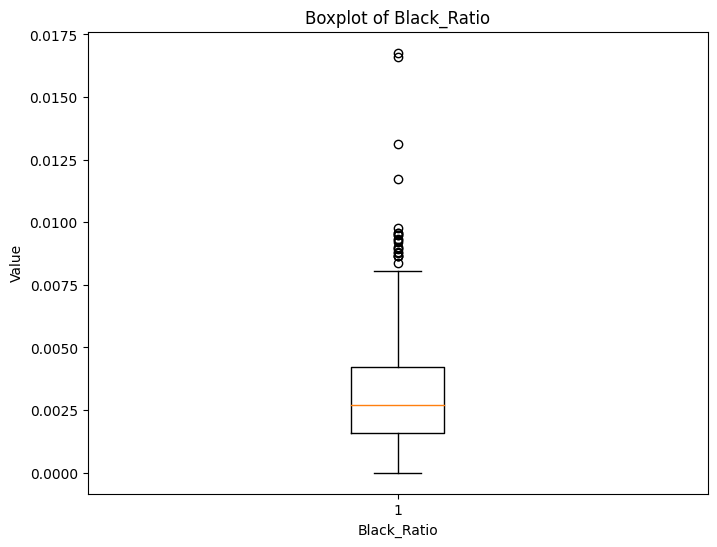

In [86]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_cpy['Black_Ratio'])
plt.xlabel('Black_Ratio')
plt.ylabel('Value')
plt.title('Boxplot of Black_Ratio')
plt.show()

In [88]:
count_zero = len(df_cpy[df_cpy['Black_Ratio'] == 0])
print("Number of rows with Black_Ratio equal to 0:", count_zero)

Number of rows with Black_Ratio equal to 0: 43


In [89]:
zero_indices = df_cpy[df_cpy['Black_Ratio'] == 0].index
print("Indices of rows with Black_Ratio equal to 0:", zero_indices)

Indices of rows with Black_Ratio equal to 0: Int64Index([  8,  22,  43,  49,  84, 101, 110, 123, 124, 132, 169, 176, 206,
            222, 297, 306, 333, 390, 420, 435, 437, 469, 485, 489, 490, 509,
            534, 536, 569, 584, 591, 604, 629, 776, 782, 785, 798, 816, 818,
            830, 845, 860, 902],
           dtype='int64')


Replace the outlier 0 with the mean value


In [90]:
df_cpy['Black_Ratio'].replace(0, np.nan, inplace=True)

# 평균값 계산
mean_ratio = df_cpy['Black_Ratio'].mean()

# 0인 값에 평균값으로 대체
df_cpy['Black_Ratio'].fillna(mean_ratio, inplace=True)

df_cpy

,QuestionId,Black_Ratio
0,0,0.002975
1,1,0.001576
2,2,0.002018
3,3,0.001341
4,4,0.003851
...,...,...
943,943,0.000651
944,944,0.003490
945,945,0.003864
946,946,0.003724


In [91]:
#다시 0이 있는지 확인
zero_indices = df_cpy[df_cpy['Black_Ratio'] == 0].index
print("Indices of rows with Black_Ratio equal to 0:", zero_indices)

Indices of rows with Black_Ratio equal to 0: Int64Index([], dtype='int64')


In [95]:
merged_df = second_clear_df.merge(df_cpy[['QuestionId', 'Black_Ratio']], left_on='left', right_on='QuestionId', how='left')
merged_df = merged_df.drop('QuestionId', axis=1)
merged_df

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,MeanCorrect_x,SEMCorrect_x,MeanCorrect_y,SEMCorrect_y,SubjectId_x,SubjectId_y,Black_Ratio
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0.530864,0.055795,0.512821,0.056962,33239225,33239228,0.003503
1,16,16,285,609,2,2,2,2.0,2,2.0,2,0.651419,0.009809,0.452665,0.012467,332144204,37188174,0.002601
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0.387779,0.016712,0.387486,0.016150,37175178,37195278,0.003206
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0.577481,0.011904,0.431193,0.047655,37191276,33239225,0.005267
4,33,33,16,586,1,1,2,2.0,2,1.6,2,0.583478,0.010282,0.246761,0.010466,33237220,37183191,0.001686
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0.516450,0.009776,0.297436,0.018916,37174182,37183191,0.003685
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0.490023,0.009794,0.601036,0.035340,33233144,371100189,0.003675
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0.514231,0.012574,0.423168,0.016996,34954258,37192278,0.001296
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0.309091,0.012998,0.847059,0.039272,37186178,33239225,0.002477
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0.720177,0.008289,0.711146,0.017972,3717374,37195278,0.004639


In [97]:
merged_df = merged_df.merge(df_cpy[['QuestionId', 'Black_Ratio']], left_on='right', right_on='QuestionId', how='left')
merged_df = merged_df.drop('QuestionId', axis=1)
merged_df

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,MeanCorrect_x,SEMCorrect_x,MeanCorrect_y,SEMCorrect_y,SubjectId_x,SubjectId_y,Black_Ratio_x,Black_Ratio_y
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0.530864,0.055795,0.512821,0.056962,33239225,33239228,0.003503,0.009577
1,16,16,285,609,2,2,2,2.0,2,2.0,2,0.651419,0.009809,0.452665,0.012467,332144204,37188174,0.002601,0.004938
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0.387779,0.016712,0.387486,0.016150,37175178,37195278,0.003206,0.006087
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0.577481,0.011904,0.431193,0.047655,37191276,33239225,0.005267,0.000781
4,33,33,16,586,1,1,2,2.0,2,1.6,2,0.583478,0.010282,0.246761,0.010466,33237220,37183191,0.001686,0.004600
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0.516450,0.009776,0.297436,0.018916,37174182,37183191,0.003685,0.004587
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0.490023,0.009794,0.601036,0.035340,33233144,371100189,0.003675,0.002171
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0.514231,0.012574,0.423168,0.016996,34954258,37192278,0.001296,0.006227
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0.309091,0.012998,0.847059,0.039272,37186178,33239225,0.002477,0.001618
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0.720177,0.008289,0.711146,0.017972,3717374,37195278,0.004639,0.005794


In [98]:
third_clear_df = merged_df.copy()

# **5. Create a logistic regression model**
Use logistic regression because the result value is only two results, left (1) or right (2)

In [124]:
from sklearn.linear_model import LogisticRegression

# 데이터셋 로드
data = third_clear_df

# 특성과 목표 변수 분할
features = data[['MeanCorrect_x',	'SEMCorrect_x',	'SubjectId_x', 'Black_Ratio_x', 'MeanCorrect_y',	'SEMCorrect_y', 'SubjectId_y', 'Black_Ratio_y']]
target = data['preference']

# 선형 회귀 모델 초기화
model = LogisticRegression()

# 모델 훈련
model.fit(features, target)

LogisticRegression()

In [125]:
check_df

,QuestionId,Count,MeanCorrect,SEMCorrect
0,0.0,2812.0,0.443457,0.009370
1,1.0,14.0,0.571429,0.137253
2,2.0,2313.0,0.385214,0.010121
3,3.0,2672.0,0.808757,0.007610
4,4.0,1704.0,0.401408,0.011878
...,...,...,...,...
943,943.0,2653.0,0.566528,0.009623
944,944.0,189.0,0.142857,0.025521
945,945.0,2337.0,0.422336,0.010220
946,946.0,111.0,0.459459,0.047516


In [126]:
subjectid_df = sorted_df.copy()
blackratio_df = df_cpy.copy()

In [127]:
merged_df = pd.concat([check_df, subjectid_df], axis=1)
merged_df

,QuestionId,Count,MeanCorrect,SEMCorrect,QuestionId,SubjectId
0,0.0,2812.0,0.443457,0.009370,0,33240245
1,1.0,14.0,0.571429,0.137253,1,33239228
2,2.0,2313.0,0.385214,0.010121,2,3323342144212
3,3.0,2672.0,0.808757,0.007610,3,33242211
4,4.0,1704.0,0.401408,0.011878,4,37188174
...,...,...,...,...,...,...
943,943.0,2653.0,0.566528,0.009623,943,33233144
944,944.0,189.0,0.142857,0.025521,944,33237221
945,945.0,2337.0,0.422336,0.010220,945,33242212
946,946.0,111.0,0.459459,0.047516,946,33239230


In [128]:
merged_df = pd.concat([merged_df, blackratio_df], axis=1)
merged_df

,QuestionId,Count,MeanCorrect,SEMCorrect,QuestionId,SubjectId,QuestionId,Black_Ratio
0,0.0,2812.0,0.443457,0.009370,0,33240245,0,0.002975
1,1.0,14.0,0.571429,0.137253,1,33239228,1,0.001576
2,2.0,2313.0,0.385214,0.010121,2,3323342144212,2,0.002018
3,3.0,2672.0,0.808757,0.007610,3,33242211,3,0.001341
4,4.0,1704.0,0.401408,0.011878,4,37188174,4,0.003851
...,...,...,...,...,...,...,...,...
943,943.0,2653.0,0.566528,0.009623,943,33233144,943,0.000651
944,944.0,189.0,0.142857,0.025521,944,33237221,944,0.003490
945,945.0,2337.0,0.422336,0.010220,945,33242212,945,0.003864
946,946.0,111.0,0.459459,0.047516,946,33239230,946,0.003724


In [129]:
test_df = merged_df.copy()

# **make ranking**

In [130]:
#점수 매길 배열 0으로 초기화
arr = []
for i in range(0,948):
  arr.append(0)

In [131]:
#이중 반복을 돌면서 비교
for i in range(0,947):
  for j in range(i+1, 948):
    newdata = pd.DataFrame({'MeanCorrect_x' : [test_df.at[i, 'MeanCorrect']], 'SEMCorrect_x' : [test_df.at[i, 'SEMCorrect']], 'SubjectId_x' : [test_df.at[i, 'SubjectId']],'Black_Ratio_x' : [test_df.at[i, 'Black_Ratio']], 'MeanCorrect_y' : [test_df.at[i, 'MeanCorrect']], 'SEMCorrect_y' : [test_df.at[i, 'SEMCorrect']], 'SubjectId_y' : [test_df.at[i, 'SubjectId']],'Black_Ratio_y' : [test_df.at[i, 'Black_Ratio']]})
    prediction = model.predict(newdata)
    if(prediction == 1):#왼쪽이 이기면
      arr[i] = arr[i]+1
      arr[j] = arr[j]-1
    else:#오른쪽이 이기면
      arr[j] = arr[j]+1
      arr[i] = arr[i]-1


In [ ]:
arr

In [133]:
#동점일 경우 처리 해야 하는데....
for repeat in range(9): #9번 정도 돌리면 중복 없어지나
  for i in range(0,947):
    for j in range(i+1, 948):
      if(arr[i] == arr[j]):#동점이라면
        newdata2 = pd.DataFrame({'left_mean' : [result_df.at[i, 'MeanCorrect']], 'left_sem' : [result_df.at[i, 'SEMCorrect']], 'left_cnt' : [result_df.at[i, 'Count']], 'right_mean' : [result_df.at[j, 'MeanCorrect']], 'right_sem' : [result_df.at[j, 'SEMCorrect']], 'right_cnt' : [result_df.at[j, 'Count']]})
        prediction = model.predict(newdata2)
        if(prediction == 1):#왼쪽이 이기면
          arr[i] = arr[i]+0.001
          arr[j] = arr[j]-0.001
        else:#오른쪽이 이기면
          arr[j] = arr[j]+0.001
          arr[i] = arr[i]-0.001

In [ ]:
arr

In [135]:
score_df = pd.DataFrame(arr)
score_df.rename(columns={0:'score'}, inplace = True)
score_df

,score
0,-947
1,-945
2,-943
3,-941
4,-939
...,...
943,939
944,941
945,943
946,945


In [136]:
ranked_array = score_df['score'].rank(ascending=False, method='min')
ranked_array

0      948.0
1      947.0
2      946.0
3      945.0
4      944.0
       ...  
943      5.0
944      4.0
945      3.0
946      2.0
947      1.0
Name: score, Length: 948, dtype: float64

In [137]:
result = pd.DataFrame(ranked_array)
result = result.reset_index()
result.rename(columns={'index':'QuestionId'}, inplace = True)
result.rename(columns={'score':'ranking'}, inplace = True)
result

,QuestionId,ranking
0,0,948.0
1,1,947.0
2,2,946.0
3,3,945.0
4,4,944.0
...,...,...
943,943,5.0
944,944,4.0
945,945,3.0
946,946,2.0


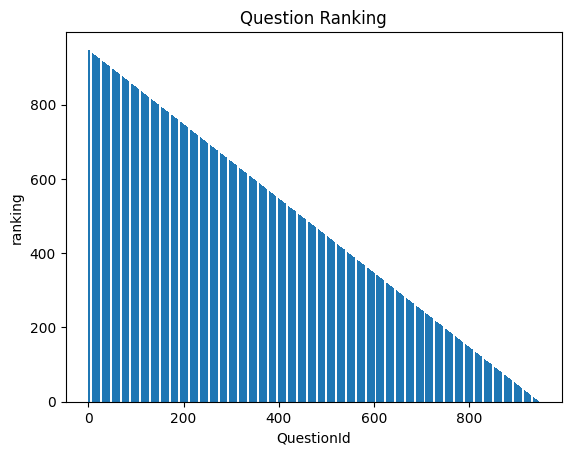

In [138]:
import matplotlib.pyplot as plt

# 데이터
QuestionId = result['QuestionId']
ranking = result['ranking']

# 막대 그래프 그리기
plt.bar(QuestionId, ranking)
plt.xlabel('QuestionId')
plt.ylabel('ranking')
plt.title('Question Ranking')

# 그래프 보여주기
plt.show()


In [139]:
result.to_csv('finalranking.csv', index=False)

# **what is problem?**

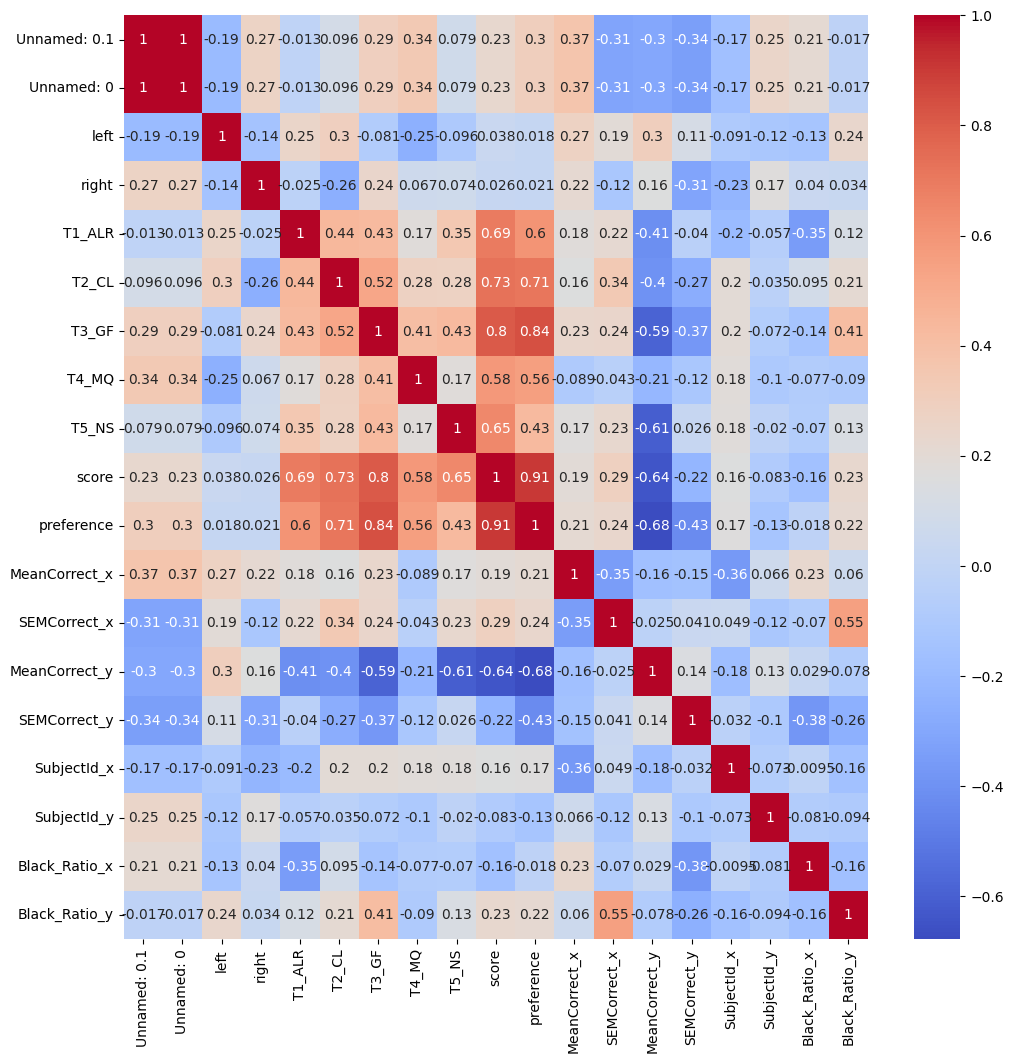

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))  # 크기 조정

df = pd.DataFrame(third_clear_df)

# 상관 행렬 계산
correlation_matrix = df.corr()

# 상관 행렬 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()